In [3]:
import matplotlib.pyplot as plt
from wavebench.plot_utils import remove_frame

## Helmholtz dataset

tensor(3.4886) tensor(0.5298)
tensor(3.2939) tensor(0.5684)
tensor(3.4591) tensor(0.5175)
tensor(3.2499) tensor(0.5814)
tensor(3.3865) tensor(0.5365)
tensor(3.5799) tensor(0.7720)
tensor(3.2006) tensor(0.6772)
tensor(3.2257) tensor(0.6469)


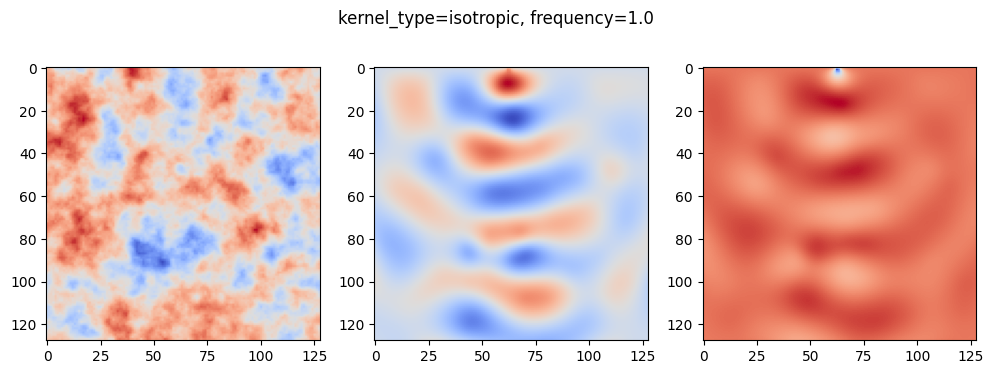

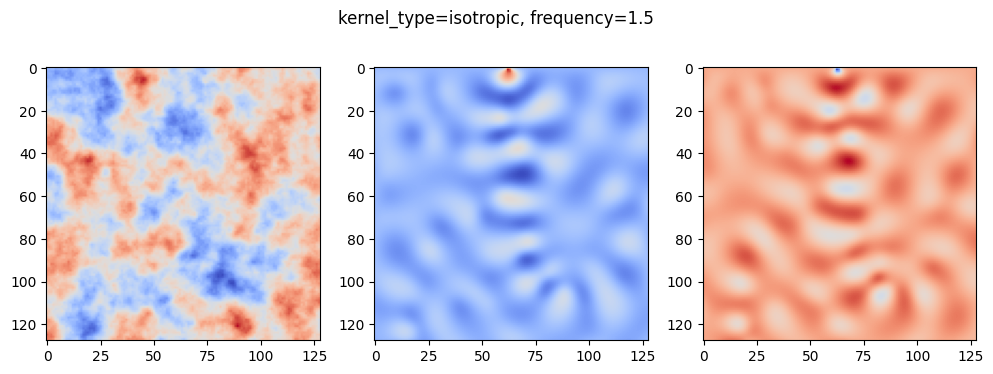

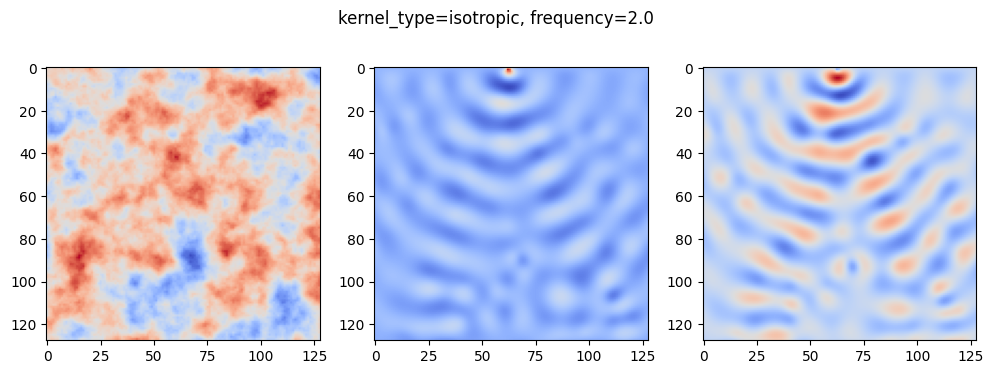

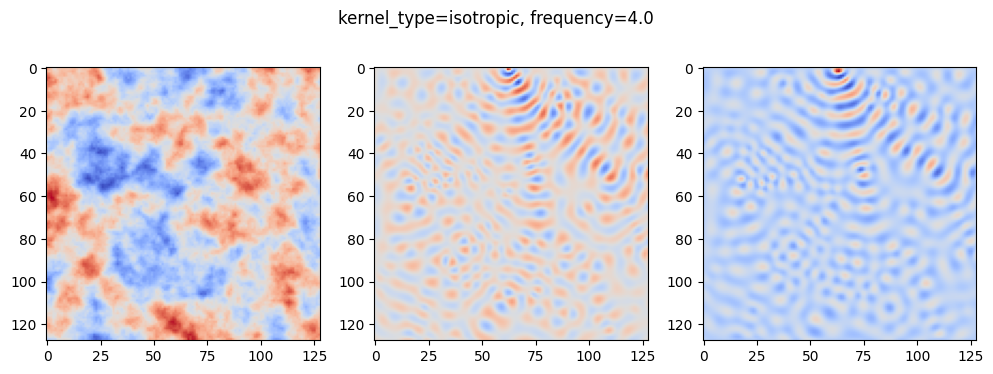

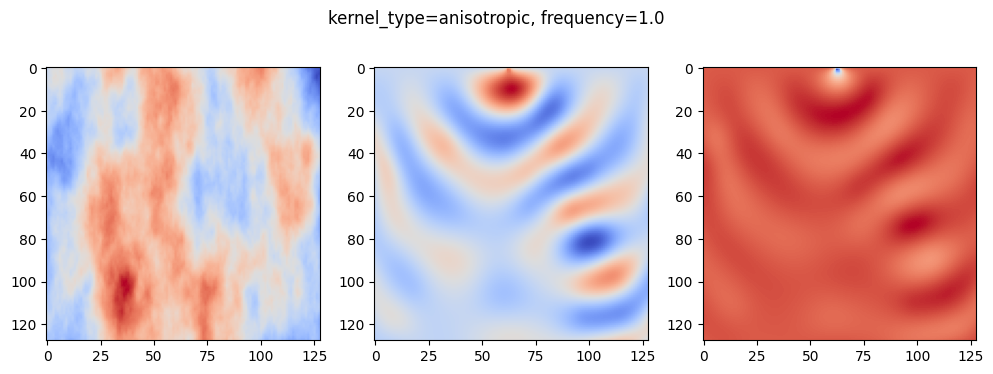

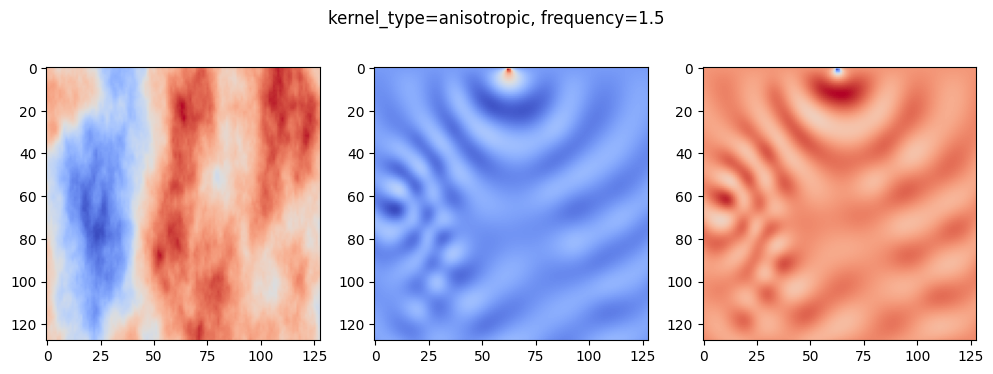

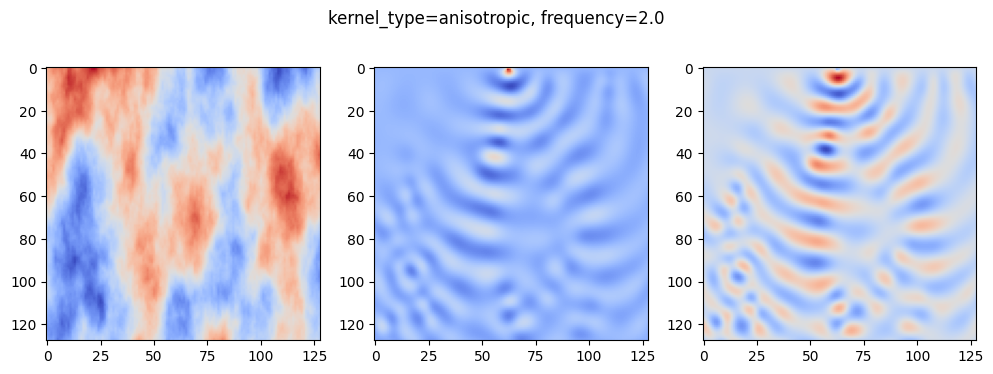

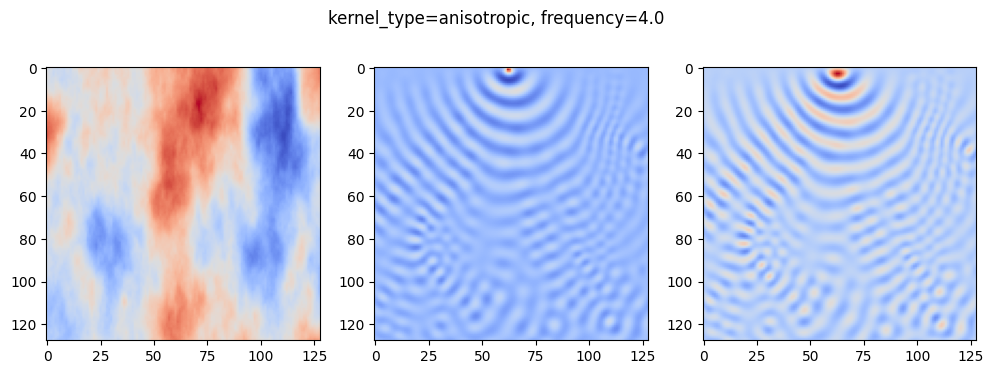

In [4]:
from wavebench.dataloaders.helmholtz_loader import get_dataloaders_helmholtz

for kernel_type in ['isotropic', 'anisotropic']:
  for frequency in [1.0, 1.5, 2.0, 4.0]:
    # kernel_type = 'isotropic'
    # frequency = 1.0

    loaders = get_dataloaders_helmholtz(kernel_type, frequency, use_ffcv=True)
    a, b = next(iter(loaders['train']))

    print(a.mean(), a.std())
    # print((a * 1e-3) .mean(), (a * 1e-3).std())
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(a.squeeze().numpy(), cmap='coolwarm')
    axes[1].imshow(b.squeeze()[0].numpy(), cmap='coolwarm')
    axes[2].imshow(b.squeeze()[1].numpy(), cmap='coolwarm')

    plt.suptitle(f'kernel_type={kernel_type}, frequency={frequency}')


In [5]:
from wavebench.nn.fno import FNO2d

In [6]:
fno = FNO2d(modes1=16, modes2=16, hidden_width=32)

In [7]:
fno(a)

tensor([[[[0.9625, 0.9637, 0.9718,  ..., 2.1015, 2.1150, 2.2177],
          [0.9532, 0.9563, 0.9663,  ..., 2.1027, 2.1655, 2.2381],
          [0.9462, 0.9507, 0.9566,  ..., 2.1339, 2.1562, 2.2453],
          ...,
          [1.4390, 1.4302, 1.4163,  ..., 0.9457, 0.8976, 0.8890],
          [1.4312, 1.4272, 1.4150,  ..., 1.0010, 0.9571, 0.9440],
          [1.4194, 1.4148, 1.4018,  ..., 1.0745, 1.0391, 1.0070]]]],
       grad_fn=<ConvolutionBackward0>)